In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import mplleaflet
import re
from datetime import datetime
from dateutil.parser import parse
import seaborn as sns

In [94]:
Datos_Valle = pd.read_csv('Datos_Valledupar.csv')
Datos_Valle = Datos_Valle[['Fecha','DescripcionSerie','Valor']]
Parametro = Datos_Valle['DescripcionSerie'].unique()

In [95]:
Datos_Valle['Year'] = Datos_Valle['Fecha']
Datos_Valle['Month'] = Datos_Valle['Fecha']
i=0
for item in Datos_Valle['Fecha']:
  Datos_Valle['Year'].iloc[i] = parse(Datos_Valle['Fecha'].iloc[i]).strftime('%Y')
  Datos_Valle['Month'].iloc[i] = parse(Datos_Valle['Fecha'].iloc[i]).strftime('%m')
  i+=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [96]:
Datos_Valle_v2 = pd.merge(Datos_Valle[(Datos_Valle['DescripcionSerie']==Parametro[0])],Datos_Valle[(Datos_Valle['DescripcionSerie']==Parametro[1])][['Fecha','Valor']],on='Fecha',how='left')
Datos_Valle_v2 = pd.merge(Datos_Valle_v2,Datos_Valle[(Datos_Valle['DescripcionSerie']==Parametro[2])][['Fecha','Valor']],on='Fecha',how='left')

In [97]:
Datos_Valle_v2.columns = ['Fecha','Borrar','Temperature_Maximum (°C)','Year','Month','Temperature_Minimun (°C)','Precipitation (mm)']
Datos_Valle_v2 = Datos_Valle_v2[['Year','Temperature_Maximum (°C)','Temperature_Minimun (°C)','Precipitation (mm)']]
Datos_Valle_v2.head()

,Year,Temperature_Maximum (°C),Temperature_Minimun (°C),Precipitation (mm)
0,2002,35.6,23.2,0.0
1,2002,35.0,22.4,0.0
2,2002,35.3,23.0,0.0
3,2002,34.8,23.0,0.0
4,2002,34.0,23.6,0.0


In [98]:
Datos_Valle_Year = Datos_Valle_v2.groupby('Year').mean()

In [99]:
ONI = pd.read_html('https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php')
ONI = ONI[3]
#Level abs: 0.5-1 Leve,1-1.5 Moderado, 1.5-2 Fuerte, 2-2.5 Muy fuerte
#ONI:Oceanic Niño Index
ONI = ONI.iloc[74:95,:].drop(82).drop(93)
ONI = ONI.astype(float)
ONI.columns = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ONI.reset_index(inplace=True,drop=True)
ONI['Year'] = ONI['Year'].astype(int)
ONI['Year'] = ONI['Year'].astype(str)
ONI_2 = ONI
ONI_2 = ONI_2.set_index('Year')
ONI_2 = ONI_2.stack()
ONI_2 = ONI_2.groupby('Year').mean()

In [100]:
Datos_con_ONI = pd.concat([Datos_Valle_Year,ONI_2],axis=1)
Datos_con_ONI = Datos_con_ONI.rename(columns={0:'Ocean Niño Index'})

                          Temperature_Maximum (°C)  ...  Ocean Niño Index
Temperature_Maximum (°C)                  1.000000  ...          0.614100
Temperature_Minimun (°C)                  0.753360  ...          0.743771
Precipitation (mm)                       -0.856962  ...         -0.486640
Ocean Niño Index                          0.614100  ...          1.000000

[4 rows x 4 columns]


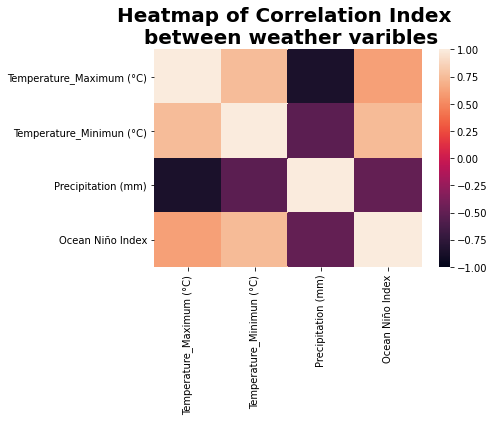

In [101]:
print(Datos_con_ONI.corr())
ax = plt.axes()
sns.heatmap(Datos_con_ONI.corr(),vmin=-1,ax=ax,)
ax.set_title('Heatmap of Correlation Index \n between weather varibles',fontsize=20,fontweight='bold')
plt.show()

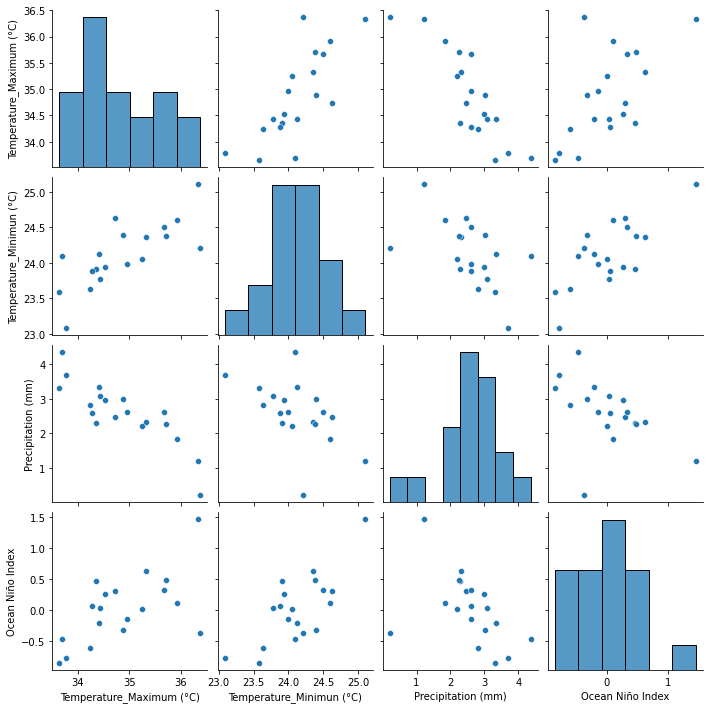

In [102]:
sns.pairplot(Datos_con_ONI)

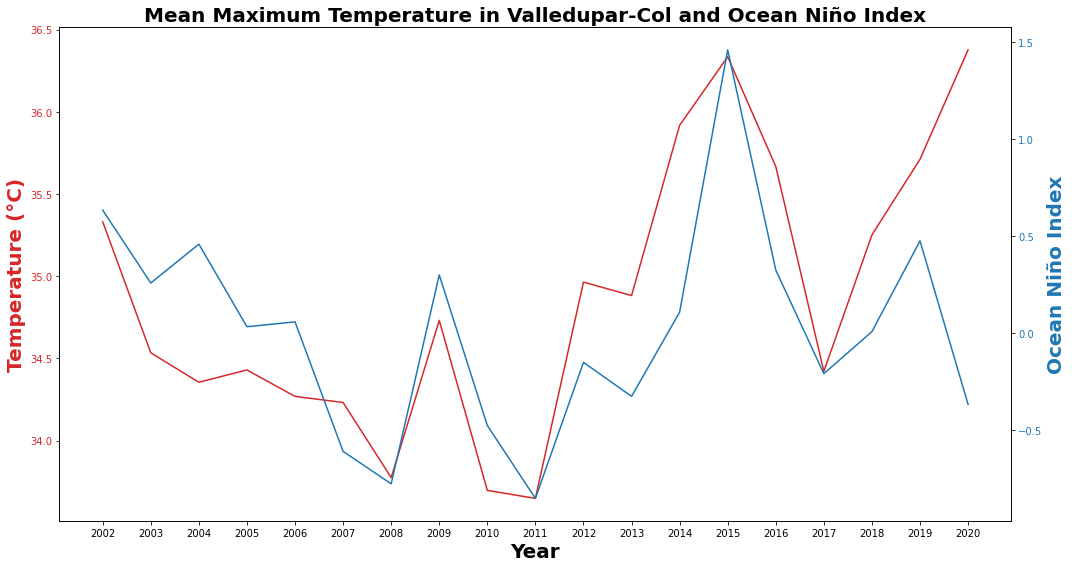

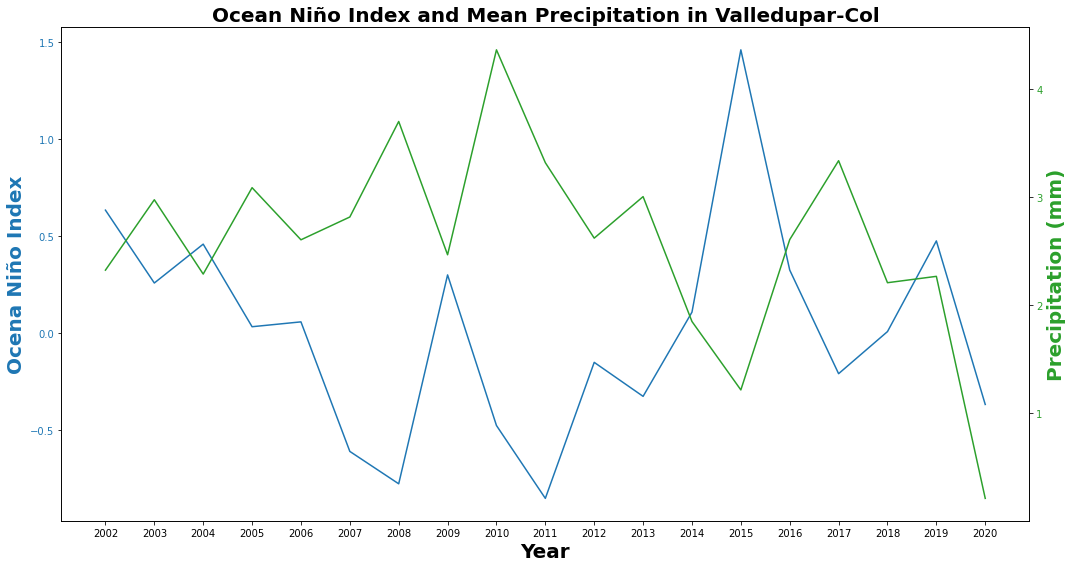

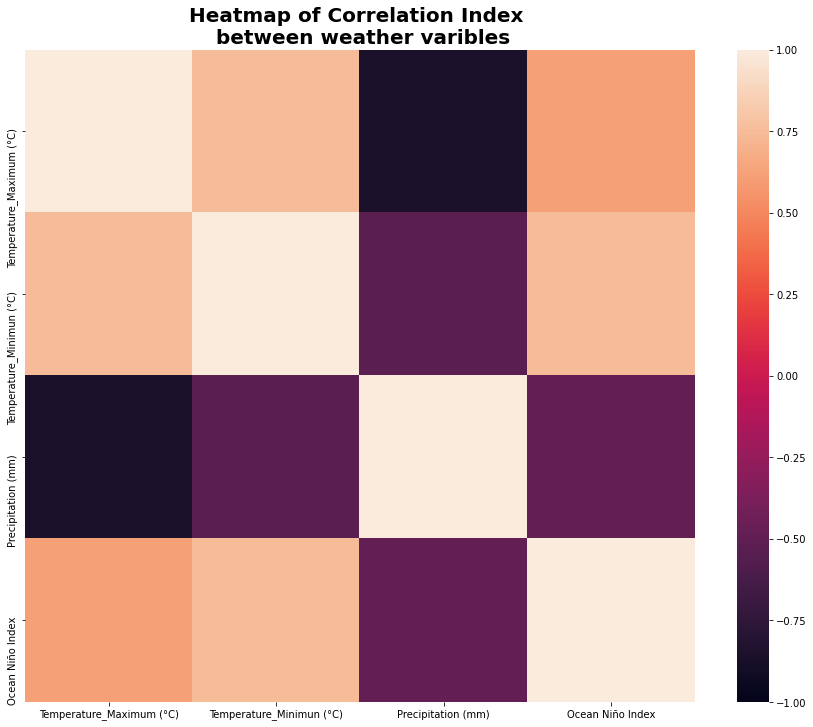

In [103]:
fig, ax1 = plt.subplots(figsize=(15,8))

color = 'tab:red'
ax1.set_xlabel('Year', fontweight = "bold",fontsize=20)
ax1.set_ylabel('Temperature (°C)', color=color, fontweight = "bold",fontsize=20)
ax1.plot(Datos_Valle_Year.index,Datos_Valle_Year['Temperature_Maximum (°C)'],color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Mean Maximum Temperature in Valledupar-Col and Ocean Niño Index', fontweight = "bold",fontsize=20)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Ocean Niño Index', color=color, fontweight = "bold",fontsize=20)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(ONI_2.index,ONI_2,)
fig.tight_layout()  # otherwise the right y-label is slightly clipped


fig, ax3 = plt.subplots(figsize=(15,8))

color = 'tab:blue'
ax3.set_xlabel('Year', fontweight = "bold",fontsize=20)
ax3.set_ylabel('Ocena Niño Index', color=color, fontweight = "bold",fontsize=20)
# ax1.plot(Datos_Valle_Year.index,Datos_Valle_Year['Temp_Max'],color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.plot(ONI_2.index,ONI_2,color=color)
ax3.set_title('Ocean Niño Index and Mean Precipitation in Valledupar-Col', fontweight = "bold",fontsize=20)
ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax4.set_ylabel('Precipitation (mm)', color=color, fontweight = "bold",fontsize=20)  # we already handled the x-label with ax1
ax4.plot(Datos_Valle_Year['Precipitation (mm)'],color=color)
ax4.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig, ax5 =plt.subplots(figsize=(15,12))
# ax = plt.axes()
sns.heatmap(Datos_con_ONI.corr(),vmin=-1,ax=ax5,)
ax5.set_title('Heatmap of Correlation Index \n between weather varibles',fontsize=20,fontweight='bold')
plt.show()

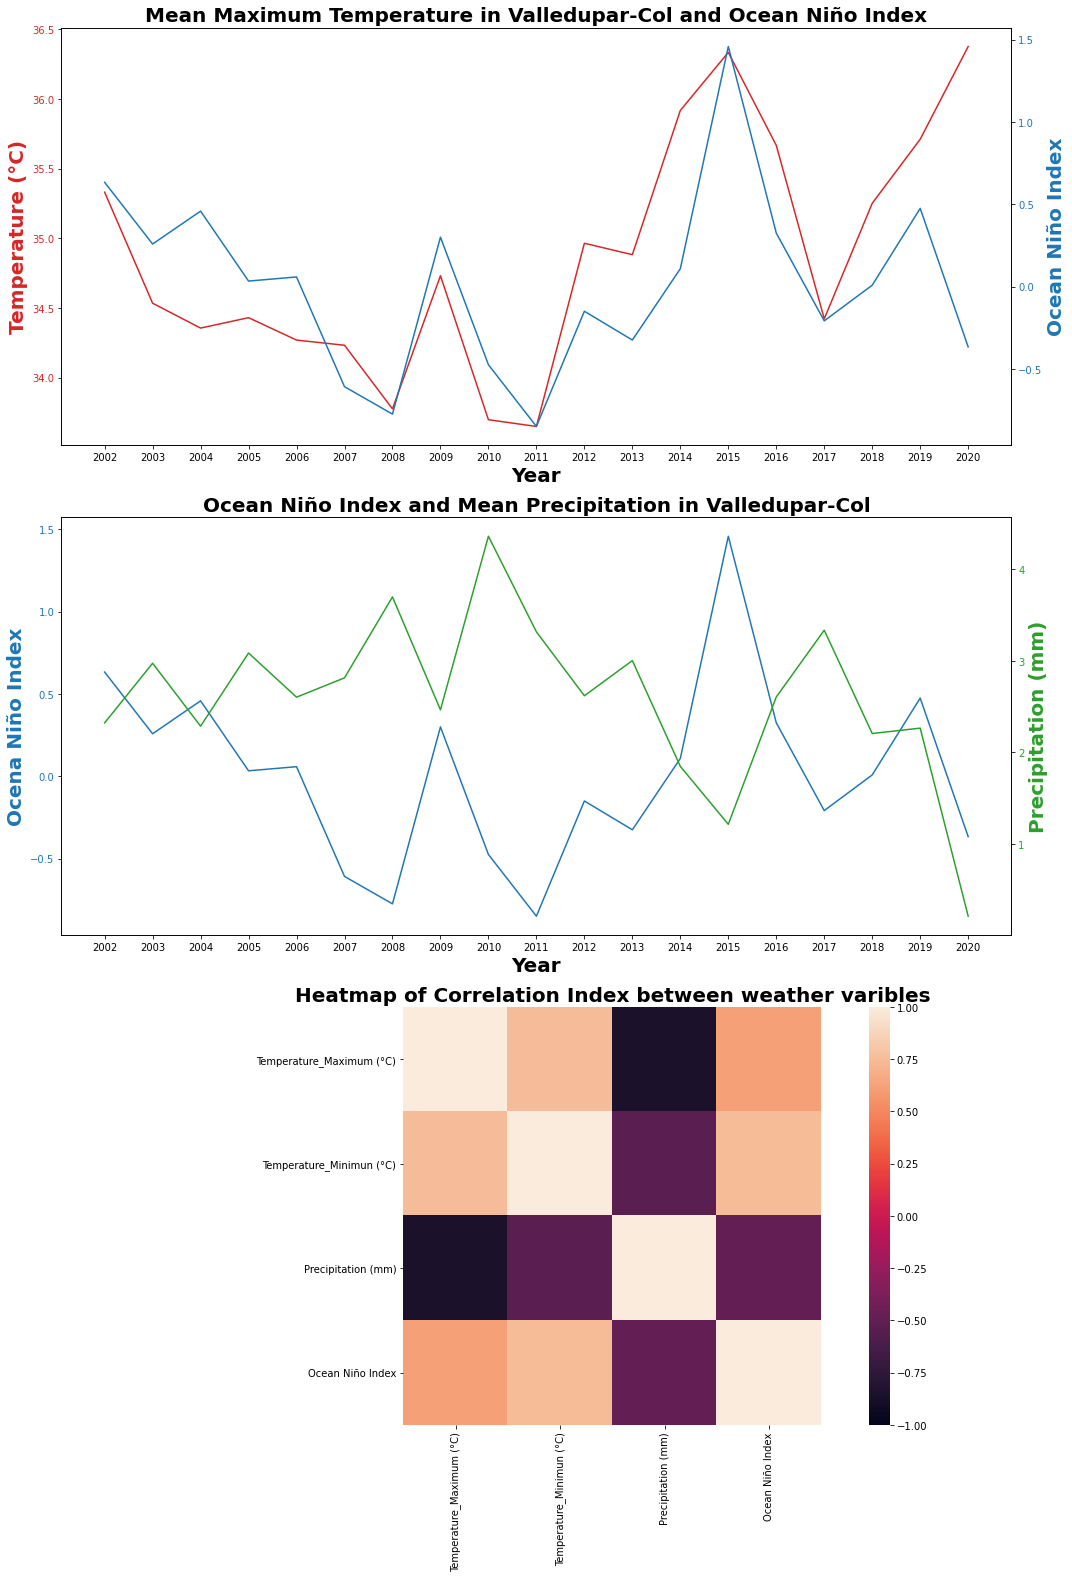

In [109]:
fig=plt.figure(figsize=(15,20)) 
ax1 = plt.subplot(3,1,1)

color = 'tab:red'
ax1.set_xlabel('Year', fontweight = "bold",fontsize=20)
ax1.set_ylabel('Temperature (°C)', color=color, fontweight = "bold",fontsize=20)
ax1.plot(Datos_Valle_Year.index,Datos_Valle_Year['Temperature_Maximum (°C)'],color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Mean Maximum Temperature in Valledupar-Col and Ocean Niño Index', fontweight = "bold",fontsize=20)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Ocean Niño Index', color=color, fontweight = "bold",fontsize=20)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(ONI_2.index,ONI_2,)
fig.tight_layout()  # otherwise the right y-label is slightly clipped


# fig, ax3 = plt.subplots(figsize=(15,12))
ax3 = plt.subplot(3,1,2)

color = 'tab:blue'
ax3.set_xlabel('Year', fontweight = "bold",fontsize=20)
ax3.set_ylabel('Ocena Niño Index', color=color, fontweight = "bold",fontsize=20)
# ax1.plot(Datos_Valle_Year.index,Datos_Valle_Year['Temp_Max'],color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.plot(ONI_2.index,ONI_2,color=color)
ax3.set_title('Ocean Niño Index and Mean Precipitation in Valledupar-Col', fontweight = "bold",fontsize=20)
ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax4.set_ylabel('Precipitation (mm)', color=color, fontweight = "bold",fontsize=20)  # we already handled the x-label with ax1
ax4.plot(Datos_Valle_Year['Precipitation (mm)'],color=color)
ax4.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# fig, ax5 =plt.subplots(figsize=(15,12))
ax5 = plt.subplot(3,1,3,aspect='equal')
# ax = plt.axes()
sns.heatmap(Datos_con_ONI.corr(),vmin=-1,ax=ax5,)
ax5.set_title('Heatmap of Correlation Index between weather varibles',fontsize=20,fontweight='bold')



plt.show()

In [105]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) is the same as
       